In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix

%matplotlib inline

In [208]:
csv_path = "Fifa21_Cleaned.csv"
data = pd.read_csv(csv_path, engine= 'python')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        18979 non-null  int64 
 1   ID                18979 non-null  int64 
 2   Name              18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Age               18979 non-null  int64 
 5   Overall           18979 non-null  int64 
 6   Potential         18979 non-null  int64 
 7   Club              18979 non-null  object
 8   Contract          18979 non-null  object
 9   Positions         18979 non-null  object
 10  Height            18979 non-null  int64 
 11  Weight            18979 non-null  int64 
 12  Preferred Foot    18979 non-null  object
 13  Best Overall      18979 non-null  int64 
 14  Best Position     18979 non-null  object
 15  Joined            18979 non-null  object
 16  On Loan           18979 non-null  int64 
 17  Value       

In [210]:
data.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [211]:
data.columns

Index(['Name', 'Nationality', 'Age', 'Overall', 'Potential', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Overall', 'Best Position', 'Joined', 'On Loan', 'Value', 'Wage',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'Reputation', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

In [212]:
data.head()

,Name,Nationality,Age,Overall,Potential,Club,Contract,Positions,Height,Weight,...,A/W,D/W,Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 - 2021,CF RW ST,170,72,...,Medium,Low,5,85,92,91,95,38,65,771
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 - 2022,LW ST,187,83,...,High,Low,5,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188,87,...,Medium,Medium,3,87,92,78,90,52,90,150
3,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 - 2023,CAM CM,181,70,...,High,High,4,76,86,93,88,64,78,207
4,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,CAM LW,175,68,...,High,Medium,5,91,85,86,94,36,59,595


## Best Position distribution

Text(0.5, 1.0, 'Number of players to Positions')

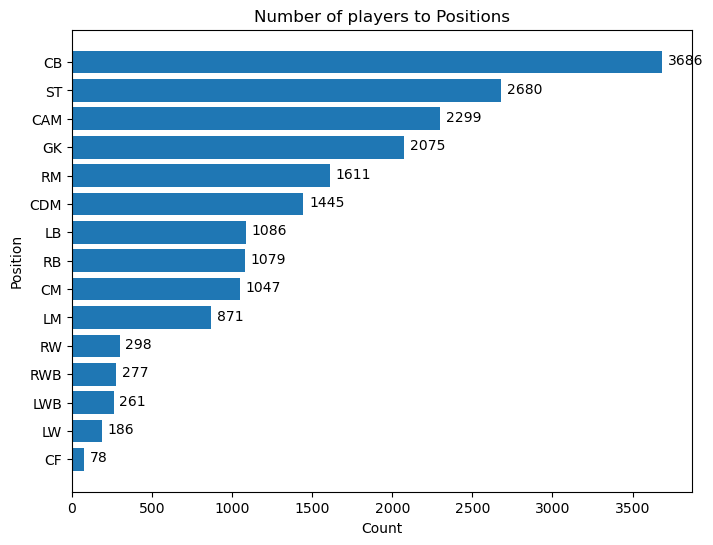

In [278]:
best_positions = data['Best Position'].value_counts()

plt.figure(figsize=(8, 6))
bar = plt.barh(best_positions.index, best_positions.values)
plt.gca().invert_yaxis()

for count, patch in zip(best_positions.values, bar.patches):
    plt.text(patch.get_width() + 35,
             patch.get_y() + 0.1, f"{count}", va="top")    
    
plt.xlabel("Count")
plt.ylabel("Position")
plt.title("Number of players to Positions")

Central Back is the position with the highest number of players, and Striker placed second.

In [ ]:
# Make a "Year Joined" column, splitted from "Joined"
data.Joined = pd.to_datetime(data.Joined)
data['Year Joined'] = data.Joined.dt.year

## Heatmap of correlations

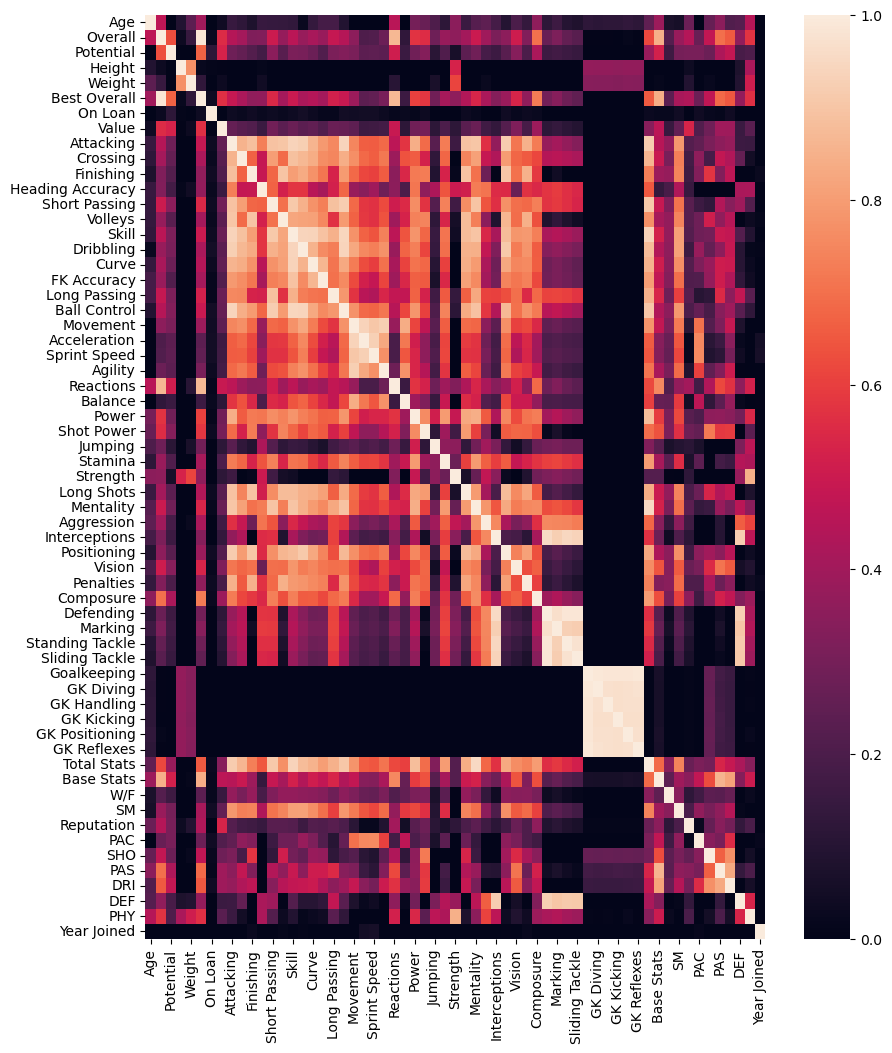

In [295]:
plt.figure(figsize=(10,12))
sns.heatmap(data.drop('Wage', axis= 1).corr(numeric_only=True), vmin=0)
plt.show()

It can be observed that Goalkeeper stats, as well as Height and Weight make little to no impact to Value and Wage of a player. The reason could be there are some other aspects to determine a value of a goalkeeper.

On the other side, Weight and Height have a positive correlations to Goalkeeper stats. The higher the Height, the better stats they are likely to have.

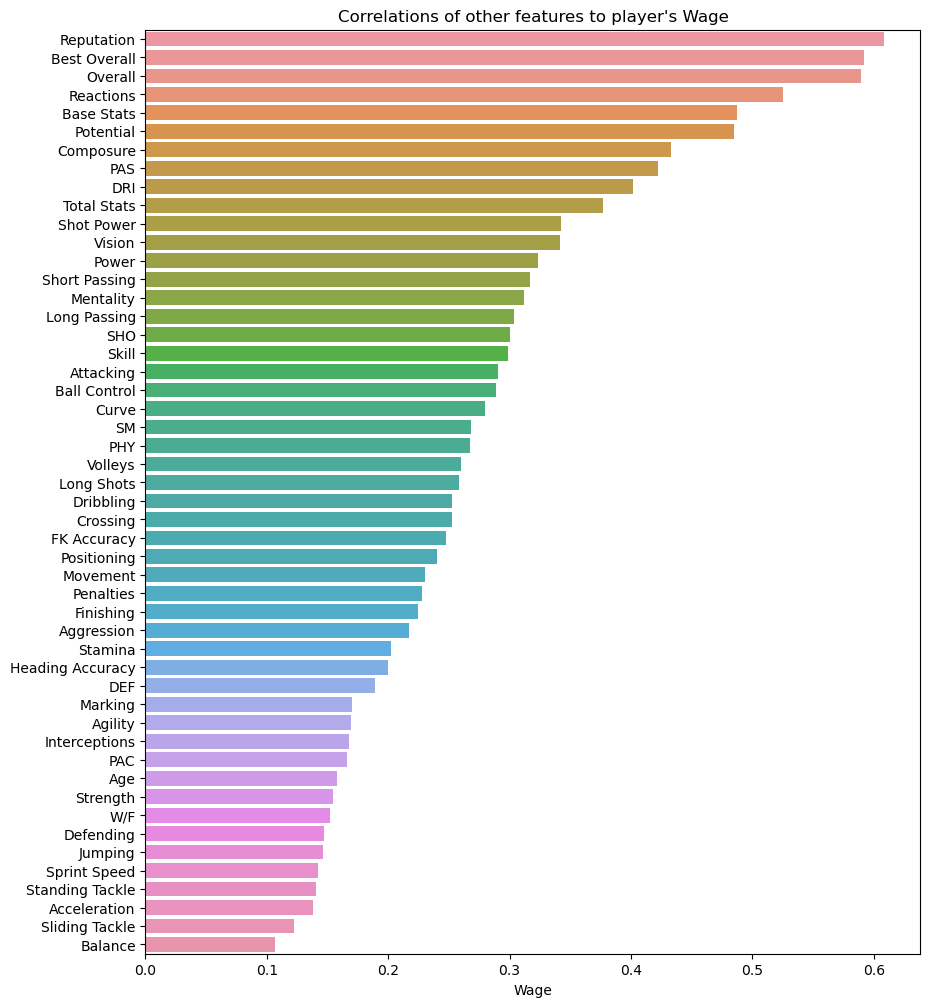

In [300]:
plt.figure(figsize=(10,12))

# Drop all the unimpactful features stated above
corr = data.corr(numeric_only=True)['Wage']\
    .drop(['Value', 'Wage', 'On Loan', 'GK Diving', 'GK Kicking', 'GK Reflexes', 'GK Positioning', 'Goalkeeping',
           'GK Handling', 'Height', 'Weight', 'Year Joined'])
corr = corr.sort_values(ascending=False)
sns.barplot(x=corr, y=corr.index)
plt.title("Correlations of other features to player's Wage")

plt.show()

It is surprisingly that the most impactful features to a player's Wage is his International Reputation, the more famous a player is, the higher Wage he likely to be offered.

In [222]:
data.Reputation.value_counts()

1    17629
2     1018
3      281
4       45
5        6
Name: Reputation, dtype: int64

It can be inferred that there are 5 ranks of Reputation a player can have, with an ascending scale from 1-5.

In [223]:
# Let's see the players having 5 points of Reputation in FIFA21, there would definitely be Messi and Ronaldo
data[data.Reputation == 5]\
    .loc[:,['Name', 'Nationality', 'Club', 'Overall', 'Reputation', 'Best Position', 'Value', 'Wage', 'Year Joined']]

,Name,Nationality,Club,Overall,Reputation,Best Position,Value,Wage,Year Joined
0,Lionel Messi,Argentina,FC Barcelona,93,5,RW,103500000,560000,2004
1,C. Ronaldo dos Santos Aveiro,Portugal,Juventus,92,5,ST,63000000,220000,2018
4,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,91,5,LW,132000000,270000,2017
14,Manuel Neuer,Germany,FC Bayern München,89,5,GK,17500000,130000,2011
45,Luis Suárez,Uruguay,Atlético Madrid,87,5,ST,51000000,115000,2020
209,Zlatan Ibrahimović,Sweden,Milan,83,5,ST,12500000,49000,2020


## Relationship between Value and Wage

<AxesSubplot: xlabel='Value', ylabel='Wage'>

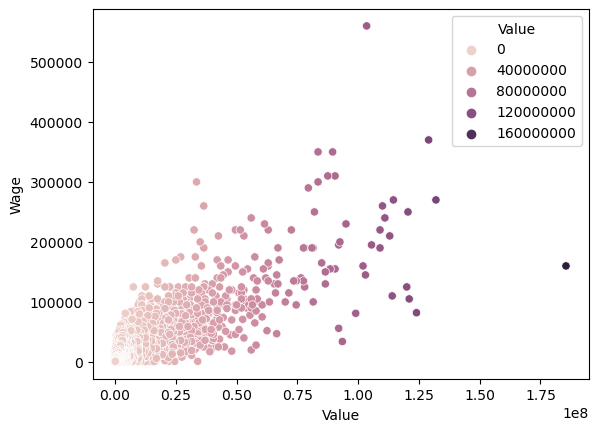

In [218]:
sns.scatterplot(data=data, x='Value', y='Wage', hue='Value')

There is a moderate positive relationship between Value and Wage, which indicates that the higher the value could be an aspect leads to a higher wage.

However, there can be seen two outliers, one having significantly high Value but low Wage, and one with average Value but outstanding Wage. Let's find out those two outliers.

In [219]:
data[data.Value > 175000000]\
    .loc[:,['Name', 'Nationality', 'Club', 'Overall', 'Reputation', 'Best Position', 'Value', 'Wage', 'Year Joined']]

,Name,Nationality,Club,Overall,Reputation,Best Position,Value,Wage,Year Joined
8,Kylian Mbappé,France,Paris Saint-Germain,90,3,ST,185500000,160000,2018


In [224]:
data[data.Wage > 500000]\
    .loc[:,['Name', 'Nationality', 'Club', 'Overall', 'Reputation', 'Best Position', 'Value', 'Wage', 'Year Joined']]

,Name,Nationality,Club,Overall,Reputation,Best Position,Value,Wage,Year Joined
0,Lionel Messi,Argentina,FC Barcelona,93,5,RW,103500000,560000,2004


## Relationship between Overall, Value and Wage

<AxesSubplot: xlabel='Overall', ylabel='Wage'>

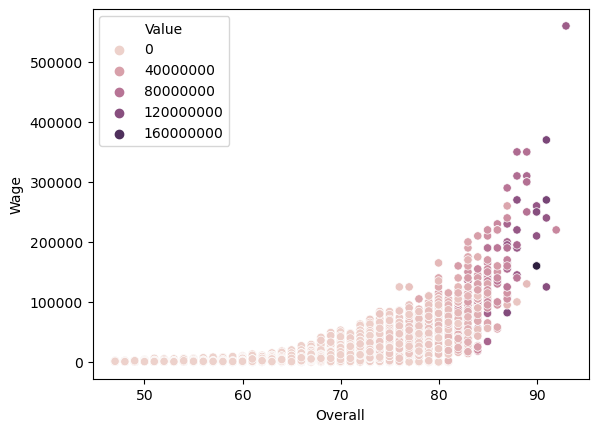

In [236]:
sns.scatterplot(data=data, x='Overall', y='Wage', hue='Value')

In [228]:
# Players having high overall rating but low market Value

data[(data.Overall > 85) & (data.Value < 40000000)]\
.loc[:,['Name', 'Nationality', 'Club', 'Overall', 'Reputation', 'Best Position', 'Value', 'Wage', 'Year Joined']].sort_values(by='Value')


,Name,Nationality,Club,Overall,Reputation,Best Position,Value,Wage,Year Joined
24,Samir Handanovič,Slovenia,Inter,88,3,GK,10000000,100000,2012
14,Manuel Neuer,Germany,FC Bayern München,89,5,GK,17500000,130000,2011
39,Giorgio Chiellini,Italy,Juventus,87,4,CB,21000000,95000,2005
38,Keylor Navas,Costa Rica,Paris Saint-Germain,87,3,GK,26000000,110000,2019
46,Hugo Lloris,France,Tottenham Hotspur,87,4,GK,26000000,125000,2012
58,David Josué Jiménez Silva,Spain,Real Sociedad,86,4,CAM,32000000,58000,2020
55,Gerard Piqué Bernabeu,Spain,FC Barcelona,86,4,CB,32500000,220000,2008
16,Sergio Ramos García,Spain,Real Madrid,89,4,CB,33500000,300000,2005
57,Yann Sommer,Switzerland,Borussia Mönchengladbach,86,3,GK,36000000,55000,2014
44,Luka Modrić,Croatia,Real Madrid,87,4,CM,36500000,260000,2012


From the table, the players having high overall rating but low market Value are either joined the club early (decade ago) or being a Goalkeeper.

In [238]:
# Players having high overall rating but not high Wage

data[(data.Overall > 90) & (data.Wage < 300000)]\
    .loc[:,['Name', 'Nationality', 'Club', 'Overall', 'Reputation', 'Best Position', 'Value', 'Wage', 'Year Joined']].sort_values(by='Wage')

,Name,Nationality,Club,Overall,Reputation,Best Position,Value,Wage,Year Joined
2,Jan Oblak,Slovenia,Atlético Madrid,91,3,GK,120000000,125000,2014
1,C. Ronaldo dos Santos Aveiro,Portugal,Juventus,92,5,ST,63000000,220000,2018
5,Robert Lewandowski,Poland,FC Bayern München,91,4,ST,111000000,240000,2014
4,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,91,5,LW,132000000,270000,2017


## Relationship between Reputation and Wage

<AxesSubplot: xlabel='Reputation', ylabel='Wage'>

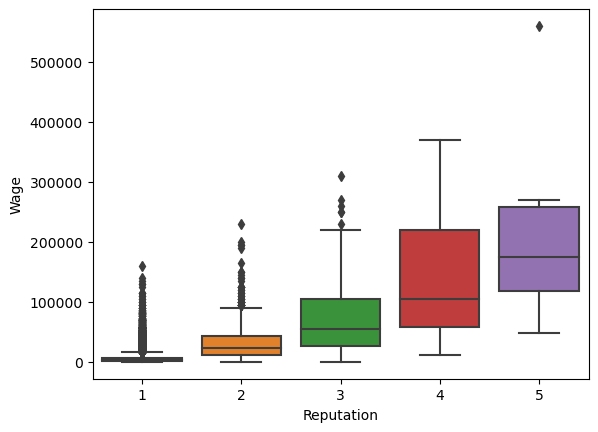

In [231]:
sns.boxplot(data=data, x='Reputation', y='Wage')

It's certainly true that the higher the Reputation, the higher the Wage median for players. While low Reputation players Wage can be varied (the presence of those outliers).

In [235]:
data[(data.Overall > 90) & (data.Wage < 300000)]\
    .loc[:,['Name', 'Nationality', 'Club', 'Overall', 'Reputation', 'Best Position', 'Value', 'Wage', 'Year Joined']].sort_values(by='Wage')

,Name,Nationality,Club,Overall,Reputation,Best Position,Value,Wage,Year Joined
2,Jan Oblak,Slovenia,Atlético Madrid,91,3,GK,120000000,125000,2014
1,C. Ronaldo dos Santos Aveiro,Portugal,Juventus,92,5,ST,63000000,220000,2018
5,Robert Lewandowski,Poland,FC Bayern München,91,4,ST,111000000,240000,2014
4,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,91,5,LW,132000000,270000,2017


## What features most impact to CB's Wage?

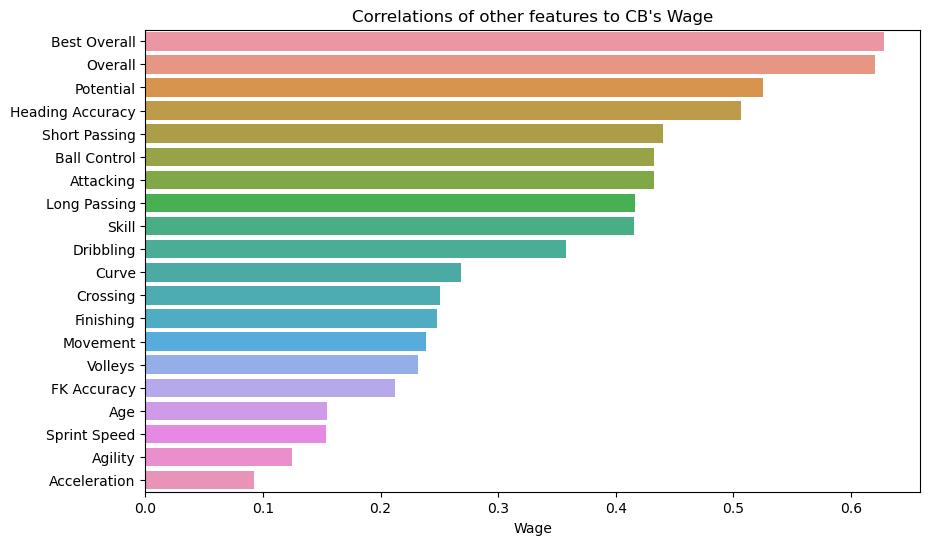

In [297]:
plt.figure(figsize=(10,6))

# Drop all the unimpactful features stated above
CB_Position_data = data[data['Best Position'] == 'CB']
corr = CB_Position_data.corr(numeric_only=True)['Wage']\
    .drop(['Value', 'Wage', 'On Loan', 'GK Diving', 'GK Kicking', 'GK Reflexes', 'GK Positioning', 'Goalkeeping',
           'GK Handling', 'Height', 'Weight', 'Year Joined', 'Balance']).iloc[:20]
corr = corr.sort_values(ascending=False)
sns.barplot(x=corr, y=corr.index)
plt.title("Correlations of other features to CB's Wage")

plt.show()

## What features most impact to ST's Wage?

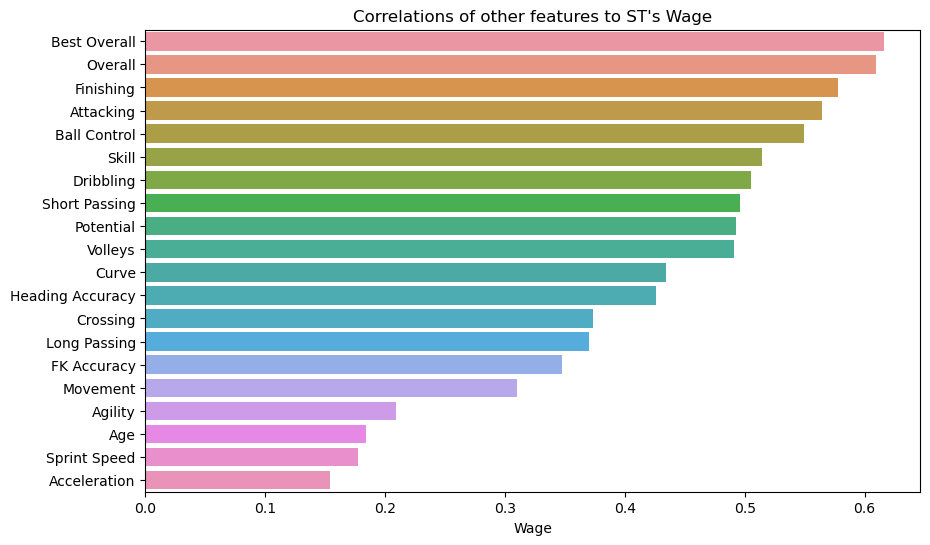

In [299]:
plt.figure(figsize=(10,6))

# Drop all the unimpactful features stated above
CB_Position_data = data[data['Best Position'] == 'ST']
corr = CB_Position_data.corr(numeric_only=True)['Wage']\
    .drop(['Value', 'Wage', 'On Loan', 'GK Diving', 'GK Kicking', 'GK Reflexes', 'GK Positioning', 'Goalkeeping',
           'GK Handling', 'Height', 'Weight', 'Year Joined', 'Balance']).iloc[:20]
corr = corr.sort_values(ascending=False)
sns.barplot(x=corr, y=corr.index)
plt.title("Correlations of other features to ST's Wage")

plt.show()